In [1]:
using Random 
using Clustering
using Plots

In [3]:
Random.seed!(2)
X = randn(Float16, (2,50))
X[1, :25] = X[1, :25] + 3
X[2, :25] = X[2, :25] - 4


Float16(-2.83)

In [4]:
seed = initseeds(:kmpp, X, 20)
km1 = kmeans(X, 2) 

KmeansResult{Matrix{Float16}, Float16, Int64}(Float16[0.9194 -0.6167; -0.2554 0.641], [2, 2, 2, 2, 1, 2, 1, 1, 1, 2  …  1, 1, 1, 2, 1, 1, 1, 1, 1, 2], Float16[1.57, 0.1934, 0.1953, 1.572, 1.384, 3.533, 0.4844, 0.0293, 2.88, 2.605  …  0.615, 0.6133, 0.7793, 0.3877, 2.912, 2.164, 0.702, 0.1641, 1.814, 0.9053], [28, 22], [28, 22], Float16(73.1), 4, true)

In [5]:
print(assignments(km1))

[2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2]

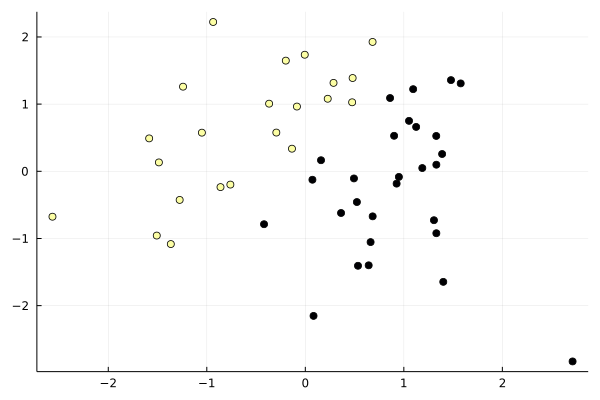

In [6]:
scatter(X[1, :], X[2, :], marker_z=km1.assignments, legend = false)

In [8]:
Random.seed!(4)
seed = initseeds(:kmpp, X, 20)
km2 = kmeans(X, 3) 

KmeansResult{Matrix{Float16}, Float16, Int64}(Float16[0.7407 0.931 -1.057; 0.7754 -1.263 0.1493], [1, 3, 3, 3, 2, 3, 1, 1, 1, 3  …  1, 2, 1, 1, 1, 2, 2, 1, 1, 1], Float16[1.48, 0.1816, 1.21, 0.379, 0.10156, 1.615, 0.6875, 0.7803, 0.9844, 4.312  …  0.0879, 0.2734, 0.4082, 0.717, 0.883, 0.3633, 0.1133, 0.7285, 0.11523, 0.3574], [24, 11, 15], [24, 11, 15], Float16(44.3), 5, true)

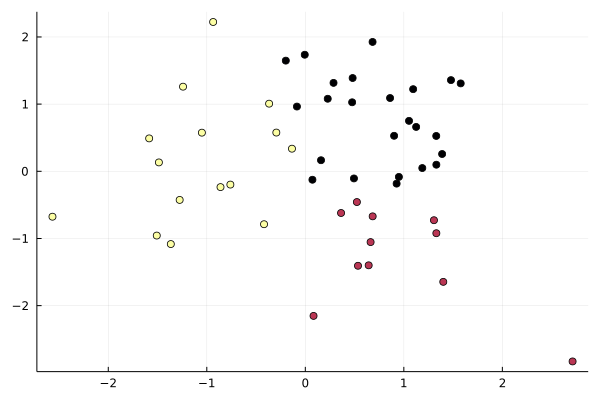

In [10]:
scatter(X[1, :], X[2, :], marker_z=km2.assignments, legend = false)

In [11]:
km2.counts

3-element Vector{Int64}:
 24
 11
 15

In [12]:
km2.centers'

3×2 adjoint(::Matrix{Float16}) with eltype Float16:
  0.7407   0.7754
  0.931   -1.263
 -1.057    0.1493

In [13]:
print(km2.assignments)

[1, 3, 3, 3, 2, 3, 1, 1, 1, 3, 3, 3, 3, 2, 1, 3, 2, 1, 1, 3, 1, 1, 1, 3, 2, 1, 1, 3, 1, 2, 2, 2, 3, 3, 1, 3, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1]